### KNN (K-Nearest Neighbour)

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
iris=load_iris()

In [3]:
x_train,x_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.25,random_state=42)

In [4]:
knn=KNeighborsClassifier(n_neighbors=4)

In [5]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [6]:
y_pred=knn.predict(x_test)

In [7]:
print(f'Accuracy Score:{accuracy_score(y_pred,y_test)}')

Accuracy Score:1.0


In [8]:
# Applying for random data
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
rng=np.random.default_rng(seed=42)
data=np.array(rng.random(size=(300,2)))

In [10]:
index=['people'+str(i) for i in range(1,301)]
df=pd.DataFrame(index=index,columns=['height','weight'])
df.head()

,height,weight
people1,NaN,NaN
people2,NaN,NaN
people3,NaN,NaN
people4,NaN,NaN
people5,NaN,NaN


In [11]:
for i,val in enumerate(df.index):
    df.loc[val,'height']=np.random.poisson(lam=np.random.randint(10,1000),size=1)
    df.loc[val,'weight']=np.random.poisson(lam=np.random.randint(10,1000),size=1)
df.head()

,height,weight
people1,824,146
people2,314,943
people3,711,568
people4,293,607
people5,791,597


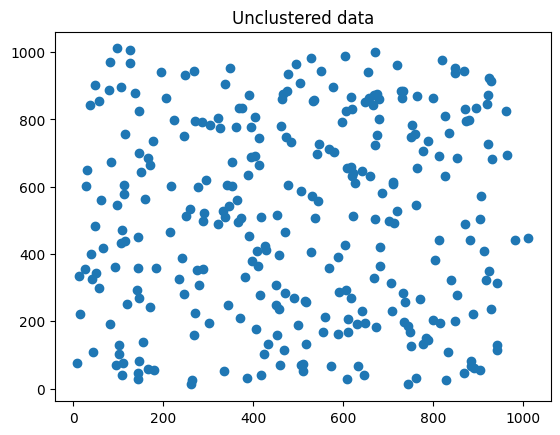

In [12]:
plt.scatter(x=df['weight'],y=df['height'])
plt.title('Unclustered data')
plt.show()

### this is creating and random points i.e many outlier it will work bad with knn

In [13]:
from sklearn.datasets import make_blobs
x, y_true = make_blobs(n_samples=300, centers=3, cluster_std=1.5, random_state=42)

In [14]:
km=KMeans(n_clusters=3,random_state=42)
y_cluster=km.fit_predict(x) # the y axis for train test split

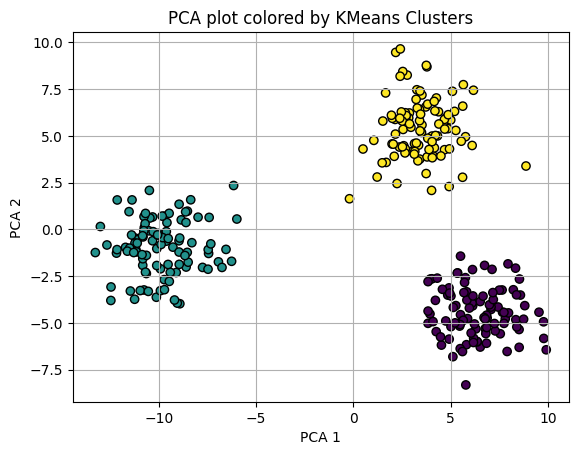

In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

# Plot PCA result with cluster labels
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_cluster, cmap='viridis', edgecolor='k')
plt.title('PCA plot colored by KMeans Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X_pca,y_cluster,test_size=0.3,random_state=42)

In [18]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [19]:
print(f'Accuracy Score:{accuracy_score(y_pred,y_test)}')

Accuracy Score:1.0
